In [44]:
import primer3
from Bio import SeqIO
from Bio.Seq import Seq
from Bio import Entrez
import csv
import pandas as pd
from collections import defaultdict,OrderedDict
from collections import Counter
import matplotlib.pyplot as plt
import csv
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna,generic_rna,generic_protein
import sys
sys.path.append("/Users/ltao/codes_tao")
from myprimer import *
from myfunc import *


In [3]:
human_g1k_37 = SeqIO.index("/Users/ltao/ref/human/hg19/human_g1k_v37.fasta", "fasta")

# Three TMs
primer3.designprimers return: i["RIGHT_TM"] doesn't match any of the two following two:
    primer3.calcTm(rev,tm_method='santalucia')
    primer3.calcTm(rev,tm_method='breslauer'))
Fix by : primer3.calcTm(rev,tm_method='santalucia') + 6


In [5]:
glioma= pd.read_excel('/Users/ltao/Projects/glioma/design/20190425targets.xlsx', sheet_name='source')

candidates=glioma.to_dict(orient="index")

for k,i in candidates.items():
    Chr=str(i['startp'].split(":")[0])
    startp=int(i['startp'].split(":")[1])-1-200
    endp=int(i["endp"].split(":")[1])+200
#     print (type(endp))
    tmlt= human_g1k_37[Chr][startp:endp].seq
    candidates[k]['tmlt']=str(tmlt)
    print(Chr, startp, endp)
    

NameError: name 'human_g1k_37' is not defined

## Design primer： from Adam

increase the lenth of primer to 18 ~30
tm: >62
increase the uniqueness of primer by blat:
primer interval shall be great than 100000??
product size ~200 or ~150?

# Primer Design

In [55]:
GLOBAL_ARGS = {
#     'PRIMER_TM_FORMULA':1,
    'PRIMER_TASK': 'pick_detection_primers',
    'PRIMER_PICK_INTERNAL_OLIGO': 0,
    'PRIMER_INTERNAL_MAX_SELF_END': 8,
    'PRIMER_OPT_SIZE': 20,
    'PRIMER_MIN_SIZE': 18,
    'PRIMER_MAX_SIZE': 32,
    'PRIMER_OPT_TM': 55,
    'PRIMER_MIN_TM': 53,
    'PRIMER_MAX_TM': 62,
    'PRIMER_TM_FORMULA': 1,
    'PRIMER_MIN_GC': 20,
    'PRIMER_MAX_GC': 80,
    'PRIMER_MAX_POLY_X': 5,
    'PRIMER_INTERNAL_MAX_POLY_X': 5,
    'PRIMER_DNA_CONC': 50.0,
    'PRIMER_MAX_NS_ACCEPTED': 0,
    'PRIMER_MAX_SELF_ANY': 12,
    'PRIMER_MAX_SELF_END': 8,
    'PRIMER_PAIR_MAX_COMPL_ANY': 12,
    'PRIMER_PAIR_MAX_COMPL_END': 8,
    'PRIMER_PAIR_MAX_DIFF_TM': 2.0,
    'PRIMER_NUM_RETURN': 1000,
    'PRIMER_FILE_FLAG': 0,
    'P3_FILE_FLAG': 0,
    'PRIMER_PRODUCT_SIZE_RANGE': [[180, 240]]}


# Invest mss

In [ ]:
mss_prms = pd.read_csv('/Users/ltao/Projects/missionbio/datasets/Tapestri-Designer-results-Myeloid/Designer/Myeloid_designSummary.tab',sep='\t')
mss_prms = mss_prms.to_dict(orient="index")

In [ ]:
mss_prms = pd.read_csv('/Users/ltao/Projects/missionbio/datasets/Tapestri-Designer-results-THP/Designer/THP_designSummary.tab',sep='\t')
mss_prms = mss_prms.to_dict(orient="index")

In [ ]:
gcs=[]
tm_d=[]
tm_b=[]
les=[]
alen=[]
for k,i in mss_prms.items():
    fwd=i['fwd_seq']
    rev=i["rev_seq"]
    gcs.append(gc(fwd))
    les.append(len(fwd))
    les.append(len(rev))
    alen.append(i["amplicon_end"]-i["amplicon_start"])
    tm_b.append(primer3.calcTm(fwd,tm_method='breslauer'))
    gcs.append(gc(rev))
    tm_b.append(primer3.calcTm(rev,tm_method='breslauer'))
    tm_d.append(primer3.calcTm(fwd))
    tm_d.append(primer3.calcTm(rev))
               
#     print(fwd,len(fwd),gc(fwd),primer3.calcTm(fwd,tm_method='breslauer'),rev,len(rev),gc(rev),primer3.calcTm(rev,tm_method='breslauer'))
#     print(fwd,len(fwd),primer3.calcTm(fwd),rev,len(rev),primer3.calcTm(rev))


In [36]:
Counter(round(i) for i in tm_d)

Counter({48: 66, 49: 21, 50: 2, 54: 2, 52: 1, 53: 1, 51: 1})

In [79]:
### clean up the primers
for k,i in candidates.items():
    i['target_primers']=dict()


In [80]:
### Setting specific parameters: 
NTR_5= "TCGTCGGCAGCGTCAGATGTGTATAAGAGACAG"
NTR_7="GTCTCGTGGGCTCGGAGATGTGTATAAGAGACAG"


mss = {
    'PRIMER_MIN_GC': 26,
    'PRIMER_MAX_GC': 70,
    'PRIMER_MAX_POLY_X': 5,
    'PRIMER_INTERNAL_MAX_POLY_X': 5,
    'PRIMER_DNA_CONC': 50.0,
    'PRIMER_MAX_NS_ACCEPTED': 0,
    'PRIMER_MAX_SELF_ANY': 12,
    'PRIMER_MAX_SELF_END': 8,
    'PRIMER_PAIR_MAX_COMPL_ANY': 12,
    'PRIMER_PAIR_MAX_COMPL_END': 0,
    'PRIMER_PAIR_MAX_DIFF_TM': 2.0,
    'PRIMER_OPT_SIZE': 24,
    'PRIMER_MIN_SIZE': 18,
    'PRIMER_MAX_SIZE': 30,
    'PRIMER_OPT_TM': 60,
    'PRIMER_MIN_TM': 57,
    'PRIMER_MAX_TM': 61,
    'PRIMER_PAIR_MAX_DIFF_TM': 2.0,
    'PRIMER_NUM_RETURN': 10,
    'PRIMER_PRODUCT_SIZE_RANGE': [[225, 260]]}

GLOBAL_ARGS.update(mss)


#### Setting target range
for key, item in candidates.items():
    primer_details = dict()
#     target_start=item['Start Position']
    target_start=200

    target_size=10
#     print (item['Hugo_Symbol'])
    safe_buffer=5
    primer_details['SEQUENCE_ID'] = item['Hugo_Symbol']
    primer_details['SEQUENCE_TEMPLATE'] = str(item["tmlt"])
    primer_details['SEQUENCE_EXCLUDED_REGION'] = [target_start-safe_buffer,target_size+safe_buffer]
    primer_details['SEQUENCE_TARGET'] = [target_start-safe_buffer,target_size+safe_buffer]
    primer3_output=primer3.designPrimers(primer_details,GLOBAL_ARGS)
    ## Parsing result
    target_primers = dict()
    chromosome =str(item['startp'].split(":")[0])
    number_of_primers = primer3_output['PRIMER_PAIR_NUM_RETURNED']
    for i in range(number_of_primers):
        target_primers[i] = {}
        target_primers[i]['LEFT'] = primer3_output['PRIMER_LEFT_{}_SEQUENCE'.format(i)]
        target_primers[i]['RIGHT'] = primer3_output['PRIMER_RIGHT_{}_SEQUENCE'.format(i)]
        target_primers[i]['LEFT_TM'] = primer3_output['PRIMER_LEFT_{}_TM'.format(i)]
        target_primers[i]['RIGHT_TM'] = primer3_output['PRIMER_RIGHT_{}_TM'.format(i)]
        target_primers[i]['LEFT_START'] = primer3_output['PRIMER_LEFT_{}'.format(i)]
        target_primers[i]['RIGHT_START'] = primer3_output['PRIMER_RIGHT_{}'.format(i)]
        target_primers[i]['Chromosome'] = chromosome
        target_primers[i]['nexfwd']=NTR_5+primer3_output['PRIMER_LEFT_{}_SEQUENCE'.format(i)]
        target_primers[i]['nexrev']=NTR_7+primer3_output['PRIMER_RIGHT_{}_SEQUENCE'.format(i)]

        target_primers[i]['AMPLICON_START_END'] = (primer3_output['PRIMER_LEFT_{}'.format(i)][0],primer3_output['PRIMER_RIGHT_{}'.format(i)][0]+1)
        target_primers[i]['AMPLICON_SIZE'] = primer3_output['PRIMER_RIGHT_{}'.format(i)][0]-primer3_output['PRIMER_LEFT_{}'.format(i)][0]+1
#         print  (target_primers)
    item['target_primers']=target_primers
    if len(target_primers)>0:
        for k,i in target_primers[0].items():
            item[k]=i

    else:
        print ('no primer returned for {}'.format(item['Hugo_Symbol']))

In [77]:
# blatter = BlatClient('localhost',8124,False)

primer_diagnosis=dict()
gcs=[]
tm_d=[]
tm_b=[]
les=[]
alen=[]


for k,i in candidates.items():
    if len(i["target_primers"])>0:
        prms = i["target_primers"][0]
        fwd=(prms['LEFT'])
        rev=(prms["RIGHT"])
        gcs.append(gc(fwd))
        les.append(len(fwd))
        les.append(len(rev))
        alen.append(i["AMPLICON_SIZE"])
        tm_b.append(primer3.calcTm(fwd,tm_method='breslauer'))
        gcs.append(gc(rev))
        tm_b.append(primer3.calcTm(rev,tm_method='breslauer') )
        tm_d.append(primer3.calcTm(fwd,tm_method='santalucia'))
        print(i["RIGHT_TM"],primer3.calcTm(rev,tm_method='santalucia'),primer3.calcTm(rev,tm_method='breslauer'))
        tm_d.append(primer3.calcTm(rev,tm_method='santalucia'))
Counter([round(i) for i in tm_d])

60.05959692215413 54.30522161996447 65.41499897863571
59.96207721339846 54.04365675092339 65.91452884043917
60.02066216489078 54.04945306618339 63.661177434694025
59.781365223613875 53.85672491739217 60.74599724550751
60.07880503041605 53.96809896645283 65.17826677176942
59.78502882665953 53.91336973502126 60.92454844267422
59.58977207240986 53.556318658883015 67.00534779022308
59.42353717862221 53.527199004392685 65.83649059368292
60.20225337889218 54.25008986413587 68.76823317478221
60.44191284629477 54.522295781758544 67.97016201375806
60.30405197402689 54.46147122599393 72.22274759350574
60.080918950006264 54.091533079802275 65.86753104511047
60.68097545655144 54.76547564661411 66.63115942023455
60.078921524909845 53.97489882569511 64.0472543209217
59.80942215238514 54.067981857371706 69.80112835171082
60.14099425583379 54.058018387334755 68.22723379524439
60.97195848872718 54.850151145606844 68.41709129448503
60.14127445706026 54.09782084450546 67.98472562692257
60.1249834590692 5

Counter({54: 78, 55: 12, 53: 2, 52: 1, 51: 1})

In [86]:
candidates_df

,Test,Hugo_Symbol,startp,endp,ccf_hat,Variant_Classification,Target this?,Was it tageted in the RNA?,tmlt,target_primers,...,RIGHT,LEFT_TM,RIGHT_TM,LEFT_START,RIGHT_START,Chromosome,AMPLICON_START_END,AMPLICON_SIZE,nexfwd,nexrev
0,201904251,TRRAP,7:98543544,7:98543544,0.74,Intron,?,V,AAGATGATTTTCCTCCCCATCCTCAGGAAAGCATTTCCGAGTGCGG...,"{0: {'LEFT': 'CTGTCAGTTTGAGGTGAGAACAAC', 'RIGH...",...,CTAACGAGTCACAGCAAAACCAG,59.965490,60.059597,"(67, 24)","(295, 23)",7,"(67, 296)",229,TCGTCGGCAGCGTCAGATGTGTATAAGAGACAGCTGTCAGTTTGAG...,GTCTCGTGGGCTCGGAGATGTGTATAAGAGACAGCTAACGAGTCAC...
1,201904252,CHCHD3,7:132659958,7:132659958,0.84,Missense_Mutation,?,V,GGTTAAACCTAAACTGTAAGCTACTTATAAAAGGCAAAAATCAAAA...,"{0: {'LEFT': 'TTTAATACTCACCAGGTGCTTTGC', 'RIGH...",...,CTGTTGACCTTTTTGGCTATGTGT,59.782450,59.962077,"(159, 24)","(399, 24)",7,"(159, 400)",241,TCGTCGGCAGCGTCAGATGTGTATAAGAGACAGTTTAATACTCACC...,GTCTCGTGGGCTCGGAGATGTGTATAAGAGACAGCTGTTGACCTTT...
2,201904253,PER1,17:8053345,17:8053345,0.54,Missense_Mutation,?,V,GCAAGGCTCGCCCTCCTCCAGGCTCCACTGCTGGTAGTATTCCTGG...,"{0: {'LEFT': 'ACTGCTGGTAGTATTCCTGGTTG', 'RIGHT...",...,AAGGACTCAGAAGGAACTCATGAC,60.055094,60.020662,"(26, 23)","(277, 24)",17,"(26, 278)",252,TCGTCGGCAGCGTCAGATGTGTATAAGAGACAGACTGCTGGTAGTA...,GTCTCGTGGGCTCGGAGATGTGTATAAGAGACAGAAGGACTCAGAA...
3,201904254,AATF,17:35310319,17:35310319,0.73,Missense_Mutation,?,V,AGTCTATGGCTTGGTATTTTCTCCAGGTAATACCCATTTTTCTCTT...,"{0: {'LEFT': 'TGGCTTGGTATTTTCTCCAGGTAA', 'RIGH...",...,GTCACTGATACTCTGGACACTGAA,59.956439,59.781365,"(6, 24)","(251, 24)",17,"(6, 252)",246,TCGTCGGCAGCGTCAGATGTGTATAAGAGACAGTGGCTTGGTATTT...,GTCTCGTGGGCTCGGAGATGTGTATAAGAGACAGGTCACTGATACT...
4,201904255,PREX1,20:47258984,20:47258984,0.79,Silent,?,V,TGATGGAGTCCACCTGGGTGGCAAGAAGCCTGGGGTTGGTTTGGGC...,"{0: {'LEFT': 'GTGACAGGAGGAACCCAAAGTT', 'RIGHT'...",...,TTCTGTAGCTGTATCCCCCTCTTA,60.422945,60.078805,"(112, 22)","(336, 24)",20,"(112, 337)",225,TCGTCGGCAGCGTCAGATGTGTATAAGAGACAGGTGACAGGAGGAA...,GTCTCGTGGGCTCGGAGATGTGTATAAGAGACAGTTCTGTAGCTGT...
5,201904256,CLIP2,7:73818289,7:73818289,0.66,3'UTR,?,V,CTCCCTGACTCCCCTCTGGCCGCCTGGCCCTCCAGGCTCTCTGAGA...,"{0: {'LEFT': 'TACTCTCTCTAGGACAAGCACTGA', 'RIGH...",...,GTACCGTTCACACTCTCTGTAGAA,60.019231,59.785029,"(66, 24)","(309, 24)",7,"(66, 310)",244,TCGTCGGCAGCGTCAGATGTGTATAAGAGACAGTACTCTCTCTAGG...,GTCTCGTGGGCTCGGAGATGTGTATAAGAGACAGGTACCGTTCACA...
6,201904257,EGFR,7:55221822,7:55221822,0.26,Missense_Mutation,V,V,TCAACACCGTGCTGCGCTTCCTCCGTGTGTGGCGCTGAGTGTACTT...,"{0: {'LEFT': 'GTCCTCTCTCCTCCATAGGTCTG', 'RIGHT...",...,CCAAAGACTCTCCAAGATGGGATA,60.750599,59.589772,"(64, 23)","(321, 24)",7,"(64, 322)",258,TCGTCGGCAGCGTCAGATGTGTATAAGAGACAGGTCCTCTCTCCTC...,GTCTCGTGGGCTCGGAGATGTGTATAAGAGACAGCCAAAGACTCTC...
7,201904258,EGFR,7:55223604,7:55223604,0.58,Missense_Mutation,V,V,ATAAAGCCAAAGGAGGATGGAGCCTTTCCATCACCCCTCAAGAGGA...,"{0: {'LEFT': 'GACAGCTATGAGATGGAGGAAGAC', 'RIGH...",...,CCATTGCCTAACCTAGCTTTACAG,60.261994,59.423537,"(169, 24)","(400, 24)",7,"(169, 401)",232,TCGTCGGCAGCGTCAGATGTGTATAAGAGACAGGACAGCTATGAGA...,GTCTCGTGGGCTCGGAGATGTGTATAAGAGACAGCCATTGCCTAAC...
8,201904259,BRAF,7:140434415,7:140434415,0.81,Frame_Shift_Ins,V,V,TCCAATGTTAAGTATAAATTTTAGTTTGGGGAAAAATTATATCTAG...,"{0: {'LEFT': 'AACCACACAAGTGTTCTTTGGTTC', 'RIGH...",...,GCTGGTTTCCAAACAGAGGATTTT,60.321675,60.202253,"(51, 24)","(277, 24)",7,"(51, 278)",227,TCGTCGGCAGCGTCAGATGTGTATAAGAGACAGAACCACACAAGTG...,GTCTCGTGGGCTCGGAGATGTGTATAAGAGACAGGCTGGTTTCCAA...
9,201904260,TP53,17:7578454,17:7578454,0.75,Frame_Shift_Del,V,V,CTTCCACTCGGATAAGATGCTGAGGAGGGGCCAGACCTAAGAGCAA...,"{0: {'LEFT': 'GACCTAAGAGCAATCAGTGAGGAA', 'RIGH...",...,CCTCAACAAGATGTTTTGCCAACT,60.081420,60.441913,"(33, 24)","(289, 24)",17,"(33, 290)",257,TCGTCGGCAGCGTCAGATGTGTATAAGAGACAGGACCTAAGAGCAA...,GTCTCGTGGGCTCGGAGATGTGTATAAGAGACAGCCTCAACAAGAT...


In [81]:
candidates_df=pd.DataFrame.from_dict(candidates, orient='index')
candidates_df.to_excel('/Users/ltao/Projects/glioma/design/20190429_ltao.xlsx')

# build ref 

In [6]:
mss_glioma = pd.read_excel('/Users/ltao/Projects/glioma/design/20190425targets.xlsx', sheet_name='output 1')
mss_glioma = mss_glioma.to_dict(orient="index")

In [8]:
dana_info = pd.read_excel('/Users/ltao/Projects/glioma/design/20190425targets.xlsx', sheet_name='source')
dana_info = dana_info.to_dict(orient="index")

In [9]:
extra_loci = pd.read_excel('/Users/ltao/Projects/glioma/design/20190429_ltao.xlsx', sheet_name='190429')
extra_loci = extra_loci.to_dict(orient="index")

In [161]:
# pair source with primersglioma= pd.read_excel('/Users/ltao/Projects/glioma/design/20190425targets.xlsx', sheet_name='source')

# candidates=glioma.to_dict(orient="index")

# for k,i in candidates.items():
#     Chr=str(i['startp'].split(":")[0])
#     startp=int(i['startp'].split(":")[1])-1-200
#     endp=int(i["endp"].split(":")[1])+200
# # #     print (type(endp))
# #     tmlt= human_g1k_37[Chr][startp:endp].seq
# #     candidates[k]['tmlt']=str(tmlt)
#     print(Chr, startp, endp)
    
for k, v in dana_info.items():
    startp=v['startp']
    endp=v["endp"]
    chrom=str(v['startp'].split(":")[0])
    chrom=v['chrom']
    t_start=v["t_start"]
    t_end=v['t_end']
#     t_start=int(v['startp'].split(":")[1])
#     t_end=int(v["endp"].split(":")[1])
#     v['chrom']=chrom
#     v["t_start"]=t_start
#     v['t_end']= t_end   

#     print(chrom,startp, t_start,endp, t_end)
#     for kk,vv in mss_glioma.items():
# #         print(chrom, vv['chr'], t_start, t_end, vv['amplicon_start'],vv['amplicon_end'])

#         if vv['chr']=='chr'+chrom and vv['amplicon_start']<t_start<vv['amplicon_end'] and vv['amplicon_start']<t_end<vv['amplicon_end']:
# #         if vv['chr']=='chr'+chrom:
        
# #             print(t_start, t_end, vv['amplicon_start'],vv['amplicon_end'])
# #             
#             print(k,kk)
            
#             for vvk,vvi in vv.items():
#                 v[vvk]=vvi

    for kk,vv in extra_loci.items():

        if startp==vv['startp']:
        
#             
#             print(k,kk)
            
            for vvk,vvi in vv.items():
                if vvk not in list(v.keys())+['Unnamed','target_primers']:
#                     print (vvk)
                    v[vvk]=vvi



In [163]:
glioma_ref=pd.DataFrame.from_dict(dana_info,orient='index')

In [170]:
glioma_ref.to_excel('/Users/ltao/Projects/glioma/design/20190429_glioma_ref.xlsx')

In [7]:
pwd

'/Users/ltao/Projects/glioma/design'

# BlAT  https://genome.ucsc.edu/FAQ/FAQblat.html#blat4

In [ ]:
# Python lib for interacting with BLAT server
import os,sys
import math

"""
	BLAT server info:
		gfServer start localhost 8123 canFam3.2bit &
		gfServer start localhost 8124 hg19.2bit &
		gfServer start localhost 8125 mm10.2bit &
		gfServer -trans -mask start localhost 8126 canFam3.2bit &
		gfServer -trans -mask start localhost 8127 hg19.2bit &
		gfServer -trans -mask start localhost 8128 mm10.2bit &
"""

class BlatClient:
	def __init__(self, host_name, port_number, is_protein_bool):
		self.host = host_name
		self.port = port_number
		self.is_protein = is_protein_bool

	def blat_sequence(self, nuc_string=""):
		"""
			Take a nucleotide sequence. Returns a list of BlatAlignment objects. 
		"""	
		blat_alignments = []

		to_blat = ">blatter\n%s" % nuc_string
		blat_results = os.popen("echo '%s' | /Users/ltao/biotools/blat/gfClient %s %i -minScore=0 -minIdentity=0 /Users/ltao/biotools/blat/ stdin stdout" % (to_blat ,self.host, self.port)).read().split("\n")
		for result in blat_results:
			spl = result.split("\t")
			if spl[0].isdigit():			
				algn = BlatAlignment(result,self.is_protein)
				blat_alignments.append(algn)

		return blat_alignments

class BlatAlignment:
	"""
		PSL format line and returns a BlatAlignment object
	"""
	def __init__(self, psl_line, is_protein_bool):
		matches,misMatches,repMatches,nCount,qNumInsert,qBaseInsert,tNumInsert,tBaseInsert,strand,qName,qSize,qStart,qEnd,tName,tSize,tStart,tEnd,blockCount,blockSizes,qStarts,tStarts = psl_line.split("\t")
		
		self.start = int(tStart.strip())
		self.stop = int(tEnd.strip())
		self.chromosome = tName.strip()
		self.strand = strand.strip()
		self.base_matches = int(matches.strip())
		self.mismatches = int(misMatches.strip())
		self.repeat_matches = int(repMatches.strip())
		self.query_size = int(qSize.strip())
		self.pct_match = float(self.base_matches) / float(self.query_size)
		self.span = self.stop - self.start
		self.num_gaps = int(tNumInsert.strip())
		self.total_gap_size = int(tBaseInsert.strip()) 
		self.n_masked_bases = int(nCount.strip())
		self.query_start = int(qStart.strip())
		self.query_stop = int(qEnd.strip())
		self.query_gap_count = int(qNumInsert.strip())
		self.query_gap_bases = int(qBaseInsert.strip())
		self.block_count = int(blockCount.strip())
		self.block_sizes = [int(x.strip()) for x in blockSizes.strip().split(",") if x != ""]
		self.query_block_starts = [int(x.strip()) for x in qStarts.strip().split(",") if x != ""]
		self.block_starts = [int(x.strip()) for x in tStarts.strip().split(",") if x != ""]
		self.is_protein = is_protein_bool

	def get_pct_ident(self):
		"""
			Calculates UCSCs percent identity score
		"""
		if self.is_protein:
			sizeMul = 3
		else:
			sizeMul = 1

		# Calculate alignment size
		qAliSize = sizeMul * (self.query_stop - self.query_start)
		tAliSize = self.stop - self.start
		aliSize = min(qAliSize, tAliSize)

		# Break if something fucked up
		if aliSize <= 0:
			return 0

		# Get difference in alignment size
		sizeDif = qAliSize - tAliSize
		if sizeDif < 0:
			sizeDif = -sizeDif
		
		insertFactor = self.query_gap_count

		total = (sizeMul * (self.base_matches + self.repeat_matches + self.mismatches))
		if total != 0:
			milliBad = (1000 * (self.mismatches * sizeMul + insertFactor + round(3 * math.log10(1 + sizeDif)))) / total
		
		pct_ident = 100.0 - milliBad * 0.1
		
		return pct_ident




In [ ]:


blatter = BlatClient('localhost',8124,False)

for k,i in candidates.items():
    if len(i["target_primers"])>0:
        prms = i["target_primers"][0]
        fwd=(prms['LEFT'])
        rev=(prms["RIGHT"])
#         print (fwd,rev)
        i['blat_fwd']=blatter.blat_sequence(fwd)
        i['blat_rev']=blatter.blat_sequence(rev)


In [ ]:
# blatter = BlatClient('localhost',8124,False)

primer_diagnosis=dict()

for k,i in candidates.items():
    if len(i["target_primers"])>0:
        prms = i["target_primers"][0]
        fwd=(prms['LEFT'])
        rev=(prms["RIGHT"])
        print(fwd,len(fwd),primer3.calcTm(fwd,tm_method='breslauer'),rev,len(rev),primer3.calcTm(rev,tm_method='breslauer'))
#         aln_fwd=i['blat_fwd']
#         aln_rev=i['blat_rev']
#         for a in aln_fwd:
#             print (a.chromosome,a.start,a.stop,a.strand)
#             print ("Base Matches",a.base_matches)
#             print ("Base mismatches",a.mismatches)
#             print ("Percent Match",a.pct_match)
#             print ("Percent Identitty",a.get_pct_ident())
        print ('''\n\n\n''')

In [ ]:
# blatter = BlatClient('localhost',8124,False)

# primer_diagnosis=dict()
unique_primer=list()

for k,i in candidates.items():
    if len(i["target_primers"])>0:
        prms = i["target_primers"][0]
        fwd=(prms['LEFT'])
        rev=(prms["RIGHT"])
        
        
        aln_fwd=i['blat_fwd']
        aln_rev=i['blat_rev']
        fr=0
        for a in aln_fwd:
            if  a.base_matches==len( fwd) and a.pct_match==1.0:
#                 print (k,'fwd',a.chromosome,a.start,a.stop,a.strand)
                fr+=1
        for a in aln_rev:
            if  a.base_matches==len( fwd) and a.pct_match==1.0:
#                 print (k,'rev',a.chromosome,a.start,a.stop,a.strand)
                fr+=1
        if fr==2:
            unique_primer.append( i["Hugo Symbol"])
        


    

In [ ]:
pickprimers = pd.read_excel('/Users/ltao/Projects/Primers/20190214-order-plate.xlsx', sheet_name='Sheet1')
pickprimers=pickprimers.to_dict(orient="index")

for k,i in pickprimers.items():
    hugo=i['Name'][:i['Name'].find('_')]
    if hugo in unique_primer:
        i['unique_fr'] = 'True'
    else:
        i['unique_fr'] = 'False'
pickprimers=pd.DataFrame.from_dict(pickprimers, orient='index')
pickprimers.to_excel('/Users/ltao/Projects/Primers/20190214-order-plate.xlsx')


In [ ]:
for k,i in hcc3850x_a.items():
    hugo=i['Hugo Symbol']
    if hugo in unique_primer:
        i['unique_fr'] = 'True'
    else:
        i['unique_fr'] = 'False'

In [ ]:
hcc3850x_a_df=pd.DataFrame.from_dict(hcc3850x_a, orient='index')
hcc3850x_a_df.to_excel('/Users/ltao/Projects/gt/design/hcc38_50x.xlsx')


In [ ]:
# pick uni primers

py-blat
=======

Python interface to BLAT server.

Example Usage:

    blatter = BlatClient('localhost',8124,False)
    dna = "TTTTCCAGTTGGGGTCCGTC"
    aligns = blatter.blat_sequence(dna)
    for a in aligns:
        print a.chromosome,a.start,a.stop,a.strand
        print "Base Matches",a.base_matches
        print "Base mismatches",a.mismatches
        print "Percent Match",a.pct_match
        print "Percent Identitty",a.get_pct_ident()



# BLAT

In [23]:
def xls2dic(file_path,sheetname):
    idh4x = pd.read_excel(file_path, sheet_name=sheetname)
    idh4x=idh4x.to_dict(orient="index")
    return idh4x

In [24]:
gref=xls2dic('/Users/ltao/Projects/glioma/design/20190429_glioma_ref.xlsx','Sheet1')

In [75]:
s=primer3.calcHeterodimer('AAAAAAAATTTTTTTAAAAA','AAAAAAAAAAAAAA')

In [77]:
primer3.calcHeterodimer

<function primer3.bindings.calcHeterodimer(seq1, seq2, mv_conc=50, dv_conc=0, dntp_conc=0.8, dna_conc=50, temp_c=37, max_loop=30)>

In [90]:
def hetero_ends(seq1,seq2,bases=3):
    if str(seq1)[-bases:]==rc(str(seq2)[-bases:]):
#         return 'ends match {}'.format(str(bases))
        return True
    else:
#         return 'no match'
        return False

In [93]:
for k,v in gref.items():
    f1=str(v["fwd_seq"])
    r1=str(v['rev_seq'])
    tmp=OrderedDict()
    tmp1=OrderedDict()

    for kk,vv in gref.items():
        fn=str(vv["fwd_seq"])
        rn=str(vv['rev_seq'])
        if hetero_ends(f1,fn):
            print (f1,fn,k,kk)
        if hetero_ends(f1,rn):
            print (f1,rn,k,kk)
        if hetero_ends(r1,fn):
            print (r1,fn,k,kk)
        if hetero_ends(r1,rn):
            print (r1,rn,k,kk)

AAAAAGATGATTTTCCTCCCCATCC GGAGACTGTATTGAGGTCCTAGGA 0 11
TTCCAGAGTTACCTGCCTTTAAAGT CCAACTCCTTTCCTCCCTGACT 1 5
TTCCAGAGTTACCTGCCTTTAAAGT TCCAAACAGATGCTGGACATACT 1 15
TTCCAGAGTTACCTGCCTTTAAAGT TCCAAACAGATGCTGGACATACT 1 44
AAGGAACTCATGACAGCACTTCG GCAGAACAAGCATATCCTGACGA 2 12
CCCCTTGAGGAGAGCATTGA GGCCAGACCTAAGAGCAATCA 4 9
CCAACTCCTTTCCTCCCTGACT TTCCAGAGTTACCTGCCTTTAAAGT 5 1
TCATTCTTTGTCCTTAAAGTAAATAAAGCC AAACAACAAGTCTCCCCTTAGGC 7 15
TCATTCTTTGTCCTTAAAGTAAATAAAGCC AAACAACAAGTCTCCCCTTAGGC 7 44
GGCCAGACCTAAGAGCAATCA CCCCTTGAGGAGAGCATTGA 9 4
TCAACAAGATGTTTTGCCAACTGG ATCACCTATGAAGGCGTCCA 9 16
TCAACAAGATGTTTTGCCAACTGG ATCACCTATGAAGGCGTCCA 9 45
GGAGACTGTATTGAGGTCCTAGGA AAAAAGATGATTTTCCTCCCCATCC 11 0
GCAGAACAAGCATATCCTGACGA AAGGAACTCATGACAGCACTTCG 12 2
TCCAAACAGATGCTGGACATACT TTCCAGAGTTACCTGCCTTTAAAGT 15 1
AAACAACAAGTCTCCCCTTAGGC TCATTCTTTGTCCTTAAAGTAAATAAAGCC 15 7
ATCACCTATGAAGGCGTCCA TCAACAAGATGTTTTGCCAACTGG 16 9
TCCAAACAGATGCTGGACATACT TTCCAGAGTTACCTGCCTTTAAAGT 44 1
AAACAACAAGTCTCCCCTTAGGC TCATT

In [61]:
cross=OrderedDict()
for k,v in gref.items():
    f1=str(v["fwd_seq"])
    r1=str(v['rev_seq'])
    tmp=OrderedDict()
    tmp1=OrderedDict()

    for kk,vv in gref.items():
        fn=str(vv["fwd_seq"])
        rn=str(vv['rev_seq'])
        #f-r
#         alignments = pairwise2.align.globalms(f1, fn,1, -1, -0.5, -0.1)
#         cross[f1][fn].append(alignments[0][2])
        tmp[fn]=primer3.calcHeterodimerTm(f1,fn)
#         alignments_end3 = pairwise2.align.globalms(f1[-5:], fn[-5:],1, -1, -0.5, -0.1)
#         print ('k1',k,'kn','f1-fn-end',kk, alignments_end3[0][2])
#         alignments = pairwise2.align.globalms(f1, rn,1, -1, -0.5, -0.1)
        tmp[rn]=primer3.calcHeterodimerTm(f1,rn)
#         cross[f1][rn].append(alignments[0][2])

#         alignments_end3 = pairwise2.align.globalms(f1[-5:], rn[-5:],1, -1, -0.5, -0.1)
#         print ('k1',k,'kn',kk, 'f1-rn-end', alignments_end3[0][2])
#         #r-f
#         alignments = pairwise2.align.globalms(r1, fn,1, -1, -0.5, -0.1)
        tmp1[fn]=primer3.calcHeterodimerTm(r1,fn)
#         cross[r1][fn].append(alignments[0][2])

#         alignments_end3 = pairwise2.align.globalms(r1[-5:], fn[-5:],1, -1, -0.5, -0.1)
#         print ('k1',k,'kn',kk, 'r1-fn-end', alignments_end3[0][2])
#         alignments = pairwise2.align.globalms(r1, rn,1, -1, -0.5, -0.1)
        tmp1[rn]=primer3.calcHeterodimerTm(r1,rn)
#         cross[r1][rn].append(alignments[0][2])
    cross[f1]=tmp
    cross[r1]=tmp1
#         alignments_end3 = pairwise2.align.globalms(r1[-5:], rn[-5:],1, -1, -0.5, -0.1)
#         print ('k1',k,'kn',kk,'r1-rn-end',  alignments_end3[0][2])



In [62]:
cross_df=pd.DataFrame.from_dict(cross,orient='index')
cross_df

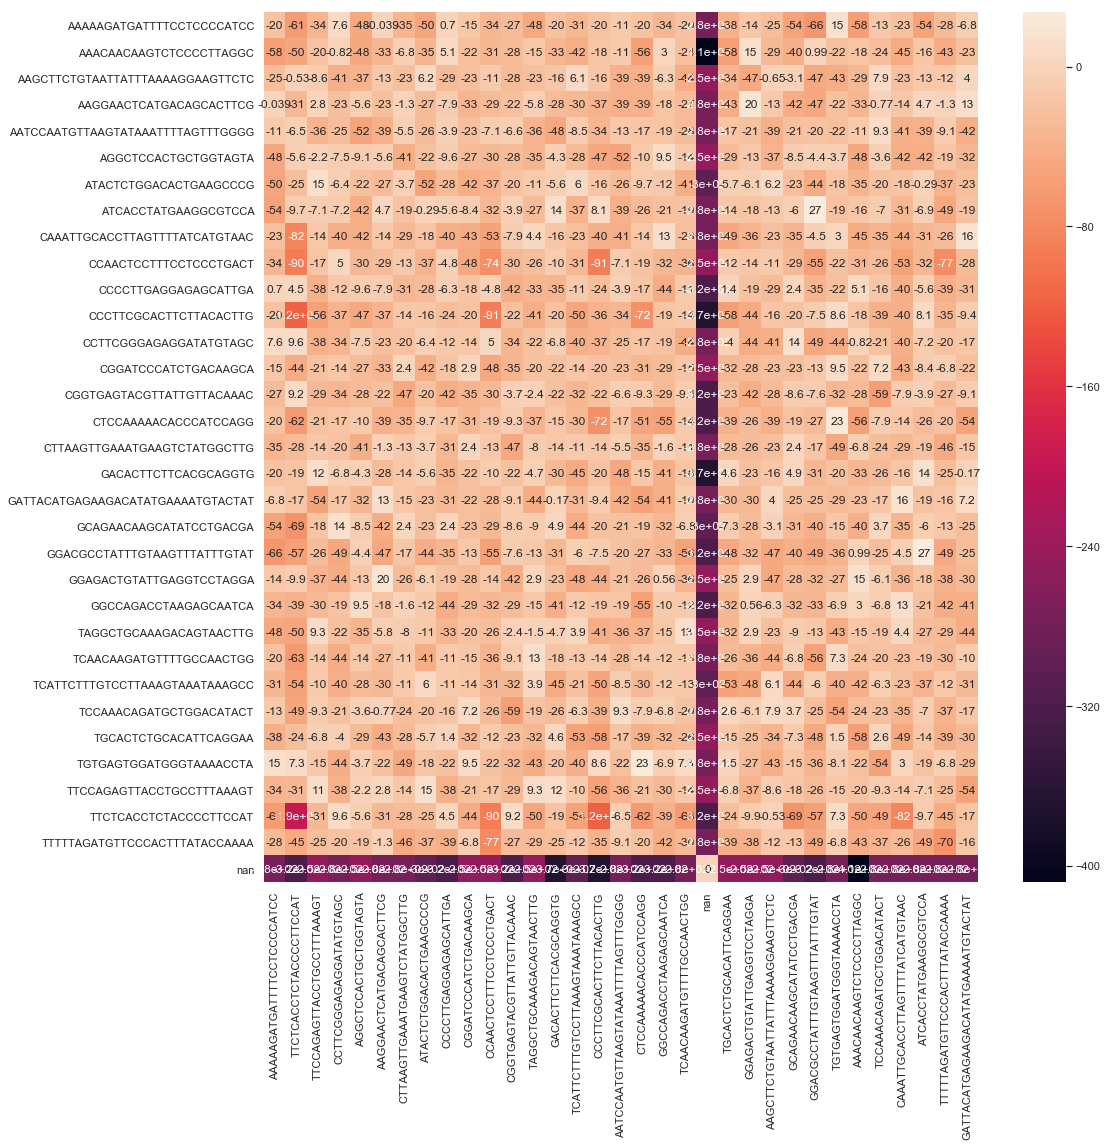

In [63]:

import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(16,16)})

sns.heatmap(cross_df, annot=True)
